In [1]:
# standard python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm


# my modules
import src.env as env
import src.wrangle as wr
import src.evaluate as evaluate 

# setting random seed to 7
np.random.seed(7)

## Evaluating Regression Models
### Exercises

### 1. Load your zillow dataset.

In [2]:
df = wr.clean_zillow_2017(small=True)

In [3]:
df = df.drop(columns = ['bedrooms','baths','year_built','tax_amount','fips'])

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [4]:
# defining dependent and independent variables
y = df['tax_value']

# not the extra set of brackets. That creates a dataframe column for x to hold.
x = df[['sq_feet']]

# This does NOT create a dataframe column. It creates a series. We need a dataframe for this model
#X = df['sq_feet']

In [5]:
# defining model using linear regression
model = lr().fit(x, y)


# we are calling yhat "predictions"
predictions = model.predict(x)


### 3. Plot the residuals for the linear regression model that you made.

In [6]:
# computing residuals
# df = x
df['predictions'] = predictions
df['y'] = y
df['residuals'] = df['y']-df['predictions']
df['residual_baseline'] = df['y'].mean() - df['y']
df['baseline'] = df['y'].mean()

In [7]:
df.head()

,Unnamed: 0,sq_feet,tax_value,predictions,y,residuals,residual_baseline,baseline
497803,497803,1349,283499,239832.218313,283499,4.366678e+04,1.767967e+05,460295.668486
522706,522706,1366,558000,247146.747447,558000,3.108533e+05,-9.770433e+04,460295.668486
704218,704218,1752,131511,413229.585436,131511,-2.817186e+05,3.287847e+05,460295.668486
857273,857273,2254,1945000,629223.328106,1945000,1.315777e+06,-1.484704e+06,460295.668486
823617,823617,3018,934000,957946.872727,934000,-2.394687e+04,-4.737043e+05,460295.668486


- I don't know how to interpret these or if they are things

In [8]:
round(df['residuals'].mean() - df['residual_baseline'].mean(),5)

0.0

In [9]:
round(df['residuals'].sum() - df['residual_baseline'].sum(),5)

1e-05

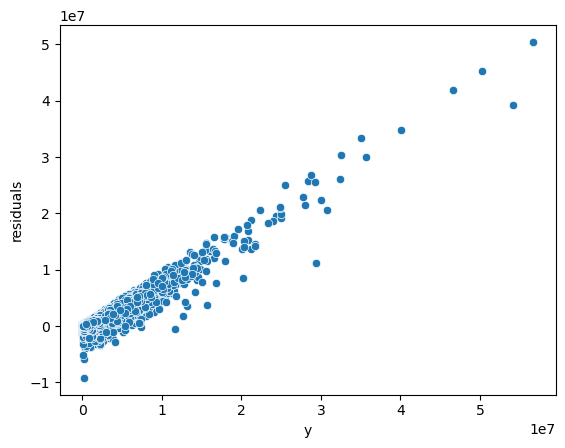

In [10]:
fig = sns.scatterplot(x = df['y'], y = df['residuals'])

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
# explained sum of squares
ess = ((df['predictions'] - df['y'].mean())**2).sum()
# sum of squres errors
sse = mean_squared_error(df['y'], df['predictions'])*len(df)
# total sum of squares
tss = ess+sse


# mean sum of squares error
mse = mean_squared_error(df['y'],df['predictions'])
# rooted sum of squares 
rmse = sqrt(mse)

r2 = ess/tss

In [12]:
r2_score(df['y'], df['baseline']) 

0.0

In [13]:
r2_score(df['y'], df['baseline']) 

0.0

In [14]:
print(f'Model Performance'
      f'\nESS = {round(ess,10)}\nSSE = {round(sse,10)}'
      f'\nTSS = {round(tss,10)}\nMSE = {round(mse,10)}'
      f'\nRMSE = {round(rmse,10)}\nR^2 = {round(r2,10)}')

Model Performance
ESS = 5.43790638105645e+16
SSE = 8.983958286055762e+16
TSS = 1.442186466711221e+17
MSE = 285593068869.94904
RMSE = 534409.0838205775
R^2 = 0.3770598675


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [15]:
# explained sum of squares, baseline is in place of predictions (or y^hat)
ess1 = ((df['baseline'] - df['y'].mean())**2).sum()
# sum of squres errors
sse1 = mean_squared_error(df['y'], df['baseline'])*len(df)
# total sum of squares
tss1 = ess1+sse1


# mean sum of squares error
mse1 = mean_squared_error(df['y'],df['baseline'])
# rooted sum of squares 
rmse1 = sqrt(mse1)

r21 = ess1/tss1

In [16]:
print(f'Baseline Performance'
      f'\nESS = {round(ess1,10)}\nSSE = {round(sse1,10)}'
      f'\nTSS = {round(tss1,10)}\nMSE = {round(mse1,10)}'
      f'\nRMSE = {round(rmse1,10)}\nR^2 = {round(r21,10)}')

Baseline Performance
ESS = 0.0
SSE = 1.4421864667112192e+17
TSS = 1.4421864667112192e+17
MSE = 458459896847.5323
RMSE = 677096.6672843194
R^2 = 0.0


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
# sse1 represents baseline (or sse prime), sse is our model
if sse < sse1:
    print(f'Our model outperforms the baseline.')
else:
    print(f'The baseline outperforms our model.')
    

Our model outperforms the baseline.


### 7. What is the amount of variance explained in your model?

In [18]:
print(f'Our model explains {round((r2*100),3)}% of the change in our target variable')

Our model explains 37.706% of the change in our target variable


In [19]:
print(f'The base model explains {round((r21*100),3)}% of the change in our target variable')

The base model explains 0.0% of the change in our target variable


### 8. Is your model better than the baseline model?

- Our model is much better than the baseline. It's not very good, but it is much better than baseline

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [41]:
import src.evaluate as evaluate

In [45]:
def regression_errors(y, yhat):


    ess, sse, tss, mse, rmse, r2 = calc_performance(y, yhat)

    print(f'''Model Performance
      ESS = {round(ess,5)}
      SSE = {round(sse,5)}
      TSS = {round(tss,5)}
      MSE = {round(mse,5)}
      RMSE = {round(rmse,5)}''')

In [62]:
def calc_performance(y, yhat):
    # explained sum of squares
    ess = sum((yhat - y.mean())**2)    
     
    # mean sum of squares error
    mse = mean_squared_error(y,yhat)
    
    # sum of squres errors
    sse = mse*len(y)
    
    # total sum of squares
    tss = ess+sse
    # rooted sum of squares 
    rmse = sqrt(mse)
    
    # R squared
    r2 = ess/tss

    return ess, sse, tss, mse, rmse, r2

In [63]:
regression_errors(df['y'], df['predictions'])

Model Performance
      ESS = 5.43790638105665e+16
      SSE = 8.983958286055762e+16
      TSS = 1.442186466711241e+17
      MSE = 285593068869.94904
      RMSE = 534409.08382


In [66]:
def baseline_mean_errors(y):
    y_mean = int(y.mean())
    calc_performance(y, y_mean)
    